In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split,cross_validate

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score,accuracy_score,recall_score,brier_score_loss,roc_curve,confusion_matrix

import scipy.stats as ss

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,YWY,BDZE,RATE,HKQX,YHBX,GEDER,company_kb,company_IT,company_cy,company_fdc,...,XYED,YQJE,DHBX_YUAN,YQCS_C,JRRC,YZYQ_B,DKSQS,CGCS,JKZE,HQCS
0,0,2.0,8,1,-0.48,1,0,0,0,0,...,0,-0.18,-0.35,0,2,0,2,1,-0.27,1
1,0,4.0,2,2,-0.45,1,0,0,0,0,...,6,-0.18,-0.35,0,5,0,3,1,-0.18,1
2,0,2.0,3,0,-0.39,1,0,0,0,0,...,0,-0.18,-0.35,1,2,0,3,1,-0.18,1
3,0,7.0,5,2,-0.16,0,0,0,0,0,...,7,-0.18,-0.35,0,5,0,1,1,0.66,1
4,0,9.0,5,3,1.57,1,0,0,0,0,...,0,-0.18,-0.35,0,6,0,0,0,-0.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,1,8.0,3,6,-0.25,1,0,1,0,0,...,6,-0.05,1.44,1,5,0,0,0,-0.35,0
8646,1,3.0,2,3,-0.53,0,0,0,0,0,...,1,-0.13,-0.17,1,2,0,0,0,-0.35,0
8647,1,6.0,3,5,-0.44,1,0,0,0,0,...,4,-0.07,0.22,3,3,0,3,1,-0.17,1
8648,1,7.0,3,6,-0.42,1,0,0,0,0,...,5,-0.05,0.59,1,5,0,0,0,-0.35,0


In [4]:
data = data.drop(columns = ['YQCS_C','credit_score','credit_rate'])

In [5]:
X = data.drop(columns = ['YWY']).copy()
Y = data['YWY'].copy()

In [6]:
kf = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0)

# KNN调参

In [8]:
knn_clf = KNeighborsClassifier()
knn_params = {'n_neighbors':[x for x in range(5,55,5)]}

knn_grid_roc = GridSearchCV(knn_clf, knn_params, cv=10,scoring='roc_auc',n_jobs=-1)

knn_grid_roc_result = knn_grid_roc.fit(x_train, y_train)

knn_rocs = knn_grid_roc_result.cv_results_['mean_test_score']
knn_roc_params = knn_grid_roc_result.cv_results_['params']
print('roc评价分数')
for roc, param in zip(knn_rocs, knn_roc_params):
    print("%f  with:   %r" % (roc, param))

print("roc最佳分数: %f 使用参数为 %s" % (knn_grid_roc_result.best_score_, knn_grid_roc.best_params_))

roc评价分数
0.801088  with:   {'n_neighbors': 5}
0.834838  with:   {'n_neighbors': 10}
0.845328  with:   {'n_neighbors': 15}
0.848398  with:   {'n_neighbors': 20}
0.851719  with:   {'n_neighbors': 25}
0.854633  with:   {'n_neighbors': 30}
0.855370  with:   {'n_neighbors': 35}
0.856520  with:   {'n_neighbors': 40}
0.857572  with:   {'n_neighbors': 45}
0.857370  with:   {'n_neighbors': 50}
roc最佳分数: 0.857572 使用参数为 {'n_neighbors': 45}


Text(0, 0.5, 'AUC')

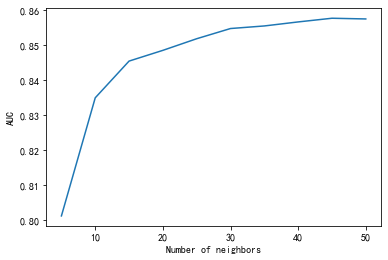

In [22]:
plt.plot(np.arange(5,51,5),knn_rocs)
plt.xlabel('Number of neighbors')
plt.ylabel('AUC')

# 随机森林调参

In [10]:
rf_clf = RandomForestClassifier(max_features='log2',random_state=0,n_jobs = -1)
rf_size = {'n_estimators':[x for x in range(10,501,10)]}
rf_grid_roc = GridSearchCV(rf_clf, rf_size, cv=10, scoring='roc_auc', n_jobs=-1)
rf_grid_roc_result = rf_grid_roc.fit(x_train, y_train)
rf_result = rf_grid_roc_result.cv_results_
rf_rocs = rf_grid_roc_result.cv_results_['mean_test_score']
rf_roc_params = rf_grid_roc_result.cv_results_['params']
print('不同随机森林大小的roc评价分数')
for roc, param in zip(rf_rocs, rf_roc_params):
    print("%f  with:   %r" % (roc, param))

print("roc最佳分数: %f 使用参数为 %s" % (rf_grid_roc_result.best_score_, rf_grid_roc_result.best_params_))

不同随机森林大小的roc评价分数
0.949534  with:   {'n_estimators': 10}
0.954827  with:   {'n_estimators': 20}
0.955508  with:   {'n_estimators': 30}
0.957662  with:   {'n_estimators': 40}
0.958578  with:   {'n_estimators': 50}
0.959582  with:   {'n_estimators': 60}
0.959895  with:   {'n_estimators': 70}
0.959314  with:   {'n_estimators': 80}
0.959457  with:   {'n_estimators': 90}
0.959544  with:   {'n_estimators': 100}
0.959223  with:   {'n_estimators': 110}
0.959040  with:   {'n_estimators': 120}
0.959056  with:   {'n_estimators': 130}
0.958819  with:   {'n_estimators': 140}
0.959064  with:   {'n_estimators': 150}
0.959505  with:   {'n_estimators': 160}
0.960168  with:   {'n_estimators': 170}
0.959924  with:   {'n_estimators': 180}
0.960144  with:   {'n_estimators': 190}
0.960333  with:   {'n_estimators': 200}
0.960208  with:   {'n_estimators': 210}
0.960331  with:   {'n_estimators': 220}
0.960540  with:   {'n_estimators': 230}
0.960404  with:   {'n_estimators': 240}
0.960501  with:   {'n_estimators

Text(0.5, 0, 'Number of Trees')

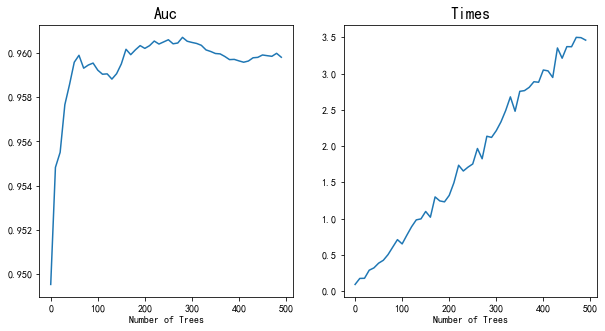

In [11]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(range(0, 500, 10),rf_rocs)
ax1.set_title('Auc',fontsize=16)
ax1.set_xlabel('Number of Trees')

ax2 = fig.add_subplot(122)
ax2.plot(range(0, 500, 10), rf_result['mean_fit_time'])
ax2.set_title('Times',fontsize=16)
ax2.set_xlabel('Number of Trees')

In [38]:
rf_clf1 = RandomForestClassifier(n_estimators=80,random_state=0,n_jobs = -1)
rf_params1 = {'max_depth':[x for x in range(5,41,5)],'max_features':[5,10,15,20]}
kf1 = StratifiedKFold(n_splits=10,random_state=110,shuffle=True)
rf_grid_roc1 = GridSearchCV(rf_clf1, rf_params1, cv=kf1, scoring='roc_auc', n_jobs=-1)

rf_grid_roc_result1 = rf_grid_roc1.fit(x_train, y_train)
rf_rocs1 = rf_grid_roc_result1.cv_results_['mean_test_score']
rf_result1 = rf_grid_roc_result1.cv_results_
rf_roc_params1 = rf_grid_roc_result1.cv_results_['params']
print('不同特征选择和决策树深度的roc评价分数')
for roc, param in zip(rf_rocs1, rf_roc_params1):
    print("%f  with:   %r" % (roc, param))
print("roc最佳分数: %f 使用参数为 %s" % (rf_grid_roc_result1.best_score_, rf_grid_roc1.best_params_))

不同特征选择和决策树深度的roc评价分数
0.960289  with:   {'max_depth': 5, 'max_features': 5}
0.961056  with:   {'max_depth': 5, 'max_features': 10}
0.961161  with:   {'max_depth': 5, 'max_features': 15}
0.960944  with:   {'max_depth': 5, 'max_features': 20}
0.962793  with:   {'max_depth': 10, 'max_features': 5}
0.963508  with:   {'max_depth': 10, 'max_features': 10}
0.964612  with:   {'max_depth': 10, 'max_features': 15}
0.965137  with:   {'max_depth': 10, 'max_features': 20}
0.961473  with:   {'max_depth': 15, 'max_features': 5}
0.963826  with:   {'max_depth': 15, 'max_features': 10}
0.964930  with:   {'max_depth': 15, 'max_features': 15}
0.965903  with:   {'max_depth': 15, 'max_features': 20}
0.963670  with:   {'max_depth': 20, 'max_features': 5}
0.965583  with:   {'max_depth': 20, 'max_features': 10}
0.962205  with:   {'max_depth': 20, 'max_features': 15}
0.963274  with:   {'max_depth': 20, 'max_features': 20}
0.961013  with:   {'max_depth': 25, 'max_features': 5}
0.963700  with:   {'max_depth': 25, 

# 主回归

In [8]:
models = {'RF':RandomForestClassifier(random_state=0,n_estimators = 80,max_depth=10,max_features = 20,n_jobs = -1),
         "SVM":SVC(probability=True),
         "LR":LogisticRegression(random_state=0),
         "Knn":KNeighborsClassifier(n_neighbors=45)}

In [9]:
mertic = {'roc_auc':pd.DataFrame(columns = ['data1','data2','data3','data4','data5'],index = models.keys()),
          'accuracy':pd.DataFrame(columns = ['data1','data2','data3','data4','data5'],index = models.keys()),
          'neg_brier_score':pd.DataFrame(columns = ['data1','data2','data3','data4','data5'],index = models.keys())}

## AUC、ACC、Beier评价指标

In [10]:
for model in models:
    for m in mertic:
        mertic[m].loc[model,:] = cross_validate(models[model],X,Y,cv = kf,scoring=m,n_jobs = -1)['test_score']

In [11]:
mertic['roc_auc']

,data1,data2,data3,data4,data5
RF,0.960903,0.968821,0.968318,0.967843,0.964999
SVM,0.916683,0.929469,0.918836,0.928953,0.929568
LR,0.865862,0.886568,0.86118,0.883581,0.874314
Knn,0.849445,0.881243,0.851927,0.866789,0.842327


In [12]:
mertic['accuracy']

,data1,data2,data3,data4,data5
RF,0.954913,0.957803,0.963006,0.953757,0.953179
SVM,0.873988,0.887283,0.875723,0.882659,0.882659
LR,0.877457,0.884393,0.872254,0.873988,0.880347
Knn,0.868786,0.87341,0.860116,0.863006,0.868786


In [13]:
mertic['neg_brier_score']

,data1,data2,data3,data4,data5
RF,-0.0368586,-0.0333224,-0.0313217,-0.0366673,-0.0375298
SVM,-0.0771615,-0.0693122,-0.0800016,-0.0779657,-0.0760312
LR,-0.0903154,-0.0859798,-0.0944397,-0.0901464,-0.0915197
Knn,-0.0974292,-0.0909704,-0.0994936,-0.0975506,-0.0988131


In [14]:
for i in mertic:
    mertic[i].to_csv('主回归结果\\'+i+'.csv')

## ROC曲线

In [23]:
from sklearn.metrics import roc_curve

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


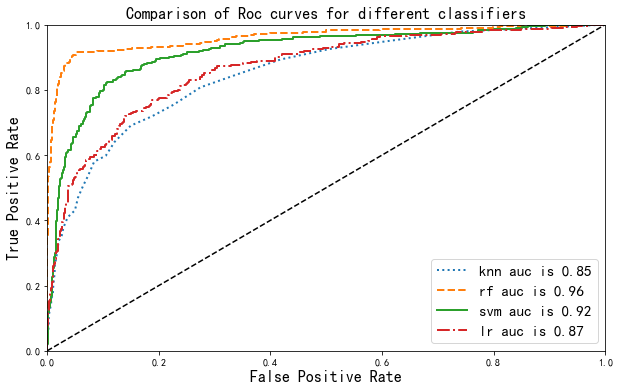

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


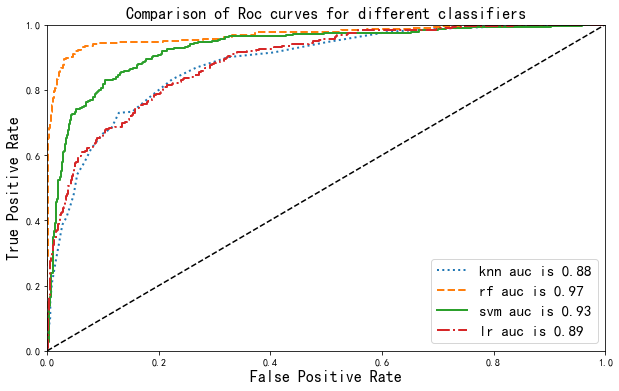

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


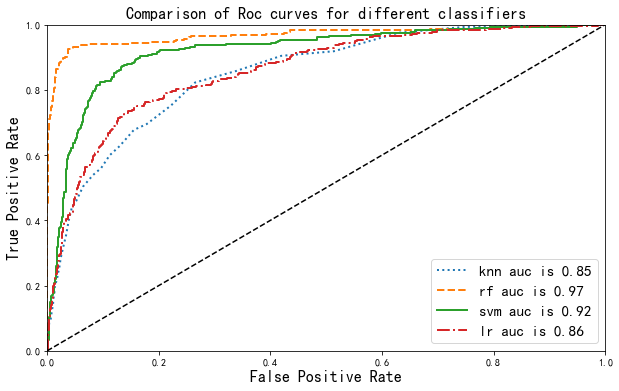

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


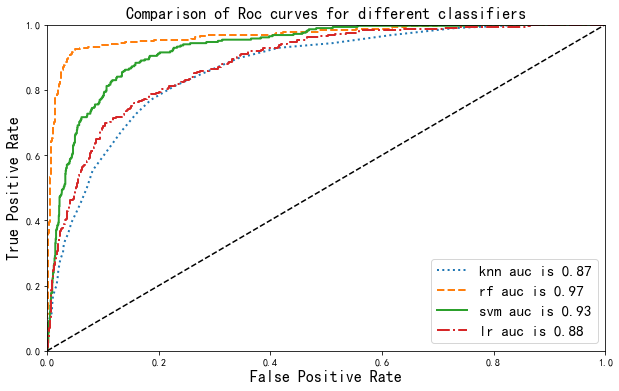

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


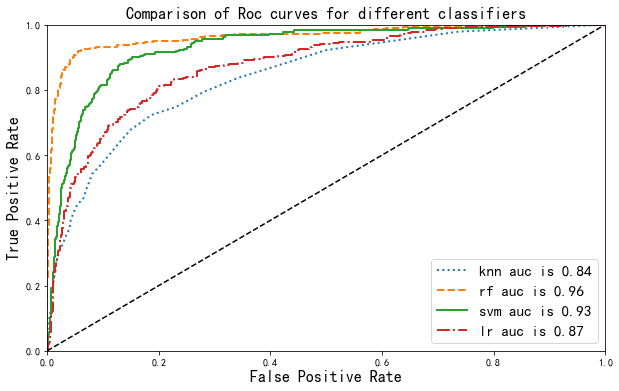

In [24]:
rf = RandomForestClassifier(random_state=0,n_estimators = 80,max_depth=10,max_features = 20,n_jobs = -1)
svm = SVC(probability=True)
lr = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors=45)

for i,(train_ind,test_ind) in enumerate(kf.split(X,Y)):
    x_train,y_train = X.iloc[train_ind],Y.iloc[train_ind]
    x_test,y_test = X.iloc[test_ind],Y.iloc[test_ind]
    
    rf.fit(x_train,y_train)
    svm.fit(x_train,y_train)
    lr.fit(x_train,y_train)
    knn.fit(x_train,y_train)
    
    rf_pb = rf.predict_proba(x_test)[:,1]
    svm_pb = svm.predict_proba(x_test)[:,1]
    lr_pb = lr.predict_proba(x_test)[:,1]
    knn_pb = knn.predict_proba(x_test)[:,1]
    
    
    rf_auc = roc_auc_score(y_test,rf_pb)
    svm_auc = roc_auc_score(y_test,svm_pb)
    lr_auc = roc_auc_score(y_test,lr_pb)
    knn_auc = roc_auc_score(y_test,knn_pb)
        
    rf_fpr,rf_tpr,rf_thes = roc_curve(y_test,rf_pb)
    svm_fpr,svm_tpr,svm_thes = roc_curve(y_test,svm_pb)
    lr_fpr,lr_tpr,lr_thes = roc_curve(y_test,lr_pb)
    knn_fpr,knn_tpr,knn_thes = roc_curve(y_test,knn_pb)
    
    plt.figure(figsize=(10, 6))
    plt.plot(knn_fpr, knn_tpr,label = 'knn auc is {:.2f}'.format(knn_auc), linestyle=':',lw = 2)
    plt.plot(rf_fpr, rf_tpr,label = 'rf auc is {:.2f}'.format(rf_auc),linestyle = '--',lw = 2)
    plt.plot(svm_fpr, svm_tpr,label='svm auc is {:.2f}'.format(svm_auc),linestyle = '-',lw = 2)
    plt.plot(lr_fpr,lr_tpr,label = 'lr auc is {:.2f}'.format(lr_auc),linestyle = '-.',lw = 2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title('Comparison of Roc curves for different classifiers',fontsize = 16)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(prop={"size":15})
    plt.show()

## IDI计算

In [114]:
def IDI_cal(new_pb,old_pb,y_test):
    idi_cal_df = pd.DataFrame(data = y_test.values,columns = ['y_true'],index = y_test.index)
    idi_cal_df['new_pb'] = new_pb
    idi_cal_df['old_pb'] = old_pb
    
    default_index = y_test[y_test == 1].index
    nodefault_index = y_test[y_test == 0].index
    
    default_df = idi_cal_df.loc[default_index]
    nodefault_df = idi_cal_df.loc[nodefault_index]
    
    default_df['diff'] = default_df['new_pb'] - default_df['old_pb']
    nodefault_df['diff'] = nodefault_df['new_pb'] - nodefault_df['old_pb']
    
    idi = default_df['diff'].mean() - nodefault_df['diff'].mean()
    idi_z = idi/(np.sqrt((default_df.var()['diff'] + nodefault_df.var()['diff'])**2))
    
    p_value = 1-ss.norm.cdf(idi_z)
    return idi,p_value

In [115]:
kf = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)

In [116]:
rf = RandomForestClassifier(random_state=0,n_estimators = 80,max_depth=10,max_features = 20,n_jobs = -1)
svm = SVC(probability=True)
lr = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors=45)

In [118]:
for i,j in kf.split(X,Y):
    x_train,y_train = X.iloc[i],Y.iloc[i]
    x_test,y_test = X.iloc[j],Y.iloc[j]
    
    rf.fit(x_train,y_train)
    rf_pb = rf.predict_proba(x_test)[:,1]
    
    lr.fit(x_train,y_train)
    lr_pb = lr.predict_proba(x_test)[:,1]
    
    idi,p = IDI_cal(rf_pb,lr_pb,y_test)
    print(idi,p)

0.3776785228780501 0.0002241489496347393
0.38519218647214437 0.0004802551574395464
0.41882193027719195 3.707568354549551e-06
0.3690476503538096 0.0009119839285426368
0.36703760555998444 0.0013275151484185566


In [119]:
for i,j in kf.split(X,Y):
    x_train,y_train = X.iloc[i],Y.iloc[i]
    x_test,y_test = X.iloc[j],Y.iloc[j]
    
    knn.fit(x_train,y_train)
    knn_pb = knn.predict_proba(x_test)[:,1]
    
    lr.fit(x_train,y_train)
    lr_pb = lr.predict_proba(x_test)[:,1]
    
    idi,p = IDI_cal(lr_pb,knn_pb,y_test)
    print(idi,p)

0.07767536284133367 0.055210962676926045
0.07140694700432984 0.043293822240645374
0.06854551941124716 0.042071154297170454
0.08806164867900343 0.021824220050089438
0.09358317279580769 0.019554029016837116


In [120]:
for i,j in kf.split(X,Y):
    x_train,y_train = X.iloc[i],Y.iloc[i]
    x_test,y_test = X.iloc[j],Y.iloc[j]
    
    svm.fit(x_train,y_train)
    svm_pb = svm.predict_proba(x_test)[:,1]
    
    lr.fit(x_train,y_train)
    lr_pb = lr.predict_proba(x_test)[:,1]
    
    idi,p = IDI_cal(lr_pb,svm_pb,y_test)
    print(idi,p)

-0.09620185863259018 0.9413130728232613
-0.12659404959749204 0.9942677197309346
-0.11544757631553582 0.9931948379731418
-0.09256021793212144 0.9706522322297813
-0.11175786579927315 0.9861538498486193


## 最大利润取值

t取值（2，50），theta取值（0.01,1)

In [121]:
t_range = np.arange(1,51,1)

In [122]:
theta_range = np.linspace(0.01,1,100)

p = TN -t*FN

In [123]:
# 将概率转换为预测
def pb_to_predict(pb,theta = 0.5):
    predict = np.where(pb>=theta,1,0)
    return predict

In [124]:
def p_cal(predict,y_test,t):
    tn, fp, fn, tp = confusion_matrix(y_test,predict).ravel()
    p = tn-t*fn
    return p

In [125]:
def p_df_cal(model,x_train,y_train,x_test,y_test):
    p_df = pd.DataFrame(index = theta_range,columns = t_range)
    model.fit(x_train,y_train)
    model_pb = model.predict_proba(x_test)[:,1]
    for t in t_range:
        for theta in theta_range:
            model_predict = pb_to_predict(model_pb,theta = theta)
            p_df.loc[theta,t] = p_cal(model_predict,y_test,t)
    return p_df

In [126]:
kf = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)

rf = RandomForestClassifier(random_state=0,n_estimators = 80,max_depth=10,max_features = 20,n_jobs = -1)
svm = SVC(probability=True)
lr = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors=45)

rf_theta_t = {}
rf_p_df_dic = {}

svm_theta_t = {}
svm_p_df_dic = {}

lr_theta_t = {}
lr_p_df_dic = {}

knn_theta_t = {}
knn_p_df_dic = {}

for i,(train,test) in enumerate(kf.split(X,Y)):
    x_train,y_train = X.iloc[train],Y.iloc[train]
    x_test,y_test = X.iloc[test],Y.iloc[test]
    
    p_df = p_df_cal(rf,x_train,y_train,x_test,y_test)
    rf_theta_t['data'+str(i)] = p_df.astype(np.float).idxmax()
    rf_p_df_dic['data'+str(i)] = p_df
    
    p_df = p_df_cal(svm,x_train,y_train,x_test,y_test)
    svm_theta_t['data'+str(i)] = p_df.astype(np.float).idxmax()
    svm_p_df_dic['data'+str(i)] = p_df
    
    p_df = p_df_cal(knn,x_train,y_train,x_test,y_test)
    knn_theta_t['data'+str(i)] = p_df.astype(np.float).idxmax()
    knn_p_df_dic['data'+str(i)] = p_df
    
    p_df = p_df_cal(lr,x_train,y_train,x_test,y_test)
    lr_theta_t['data'+str(i)] = p_df.astype(np.float).idxmax()
    lr_p_df_dic['data'+str(i)] = p_df

In [127]:
rf_theta_t

{'data0': 1     0.50
 2     0.33
 3     0.17
 4     0.17
 5     0.17
 6     0.17
 7     0.13
 8     0.13
 9     0.13
 10    0.13
 11    0.13
 12    0.13
 13    0.13
 14    0.13
 15    0.13
 16    0.13
 17    0.13
 18    0.13
 19    0.13
 20    0.13
 21    0.13
 22    0.13
 23    0.13
 24    0.13
 25    0.13
 26    0.13
 27    0.13
 28    0.13
 29    0.13
 30    0.13
 31    0.02
 32    0.02
 33    0.02
 34    0.02
 35    0.02
 36    0.02
 37    0.02
 38    0.02
 39    0.02
 40    0.02
 41    0.02
 42    0.02
 43    0.02
 44    0.02
 45    0.02
 46    0.02
 47    0.02
 48    0.02
 49    0.02
 50    0.02
 dtype: float64,
 'data1': 1     0.56
 2     0.42
 3     0.42
 4     0.15
 5     0.15
 6     0.15
 7     0.10
 8     0.09
 9     0.09
 10    0.09
 11    0.09
 12    0.09
 13    0.09
 14    0.09
 15    0.09
 16    0.07
 17    0.07
 18    0.07
 19    0.07
 20    0.07
 21    0.07
 22    0.07
 23    0.07
 24    0.07
 25    0.07
 26    0.07
 27    0.07
 28    0.07
 29    0.07
 30    0.07
 31  

In [129]:
rf_theta_t_df = pd.DataFrame()
for i in rf_theta_t:
    rf_theta_t_df[i] = rf_theta_t[i]

In [132]:
rf_theta_t_df.to_csv('主回归随机森林阈值与t.csv')

In [134]:
svm_theta_t_df = pd.DataFrame()
for i in svm_theta_t:
    svm_theta_t_df[i] = svm_theta_t[i]

In [141]:
svm_theta_t_df.to_csv('主回归支持向量机阈值与t.csv')

In [139]:
knn_theta_t_df = pd.DataFrame()
for i in knn_theta_t:
    knn_theta_t_df[i] = knn_theta_t[i]

In [142]:
knn_theta_t_df.to_csv('主回归knn阈值与t.csv')

In [143]:
lr_theta_t_df = pd.DataFrame()
for i in lr_theta_t:
    lr_theta_t_df[i] = lr_theta_t[i]

In [144]:
lr_theta_t_df.to_csv('主回归逻辑回归阈值与t.csv')

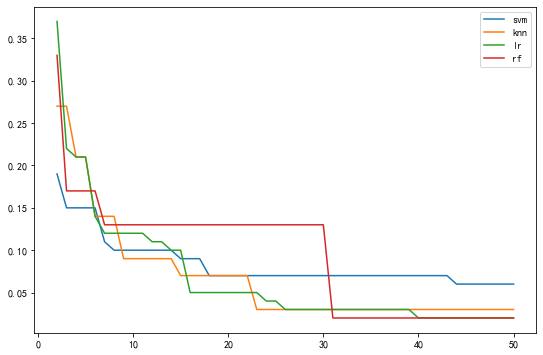

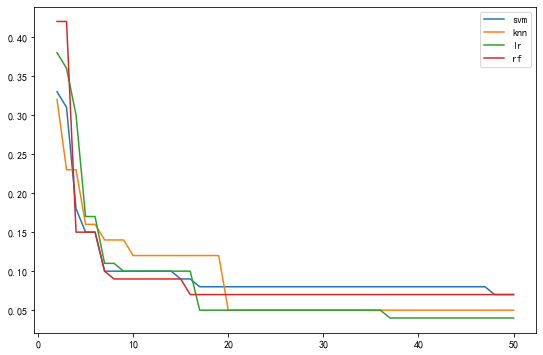

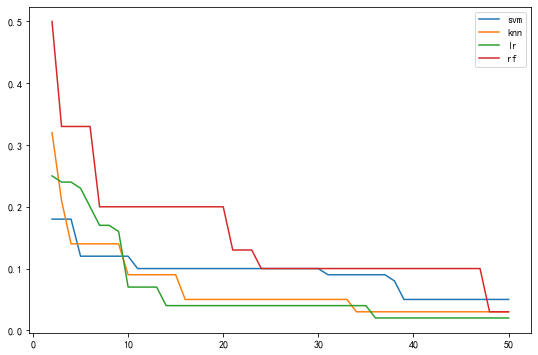

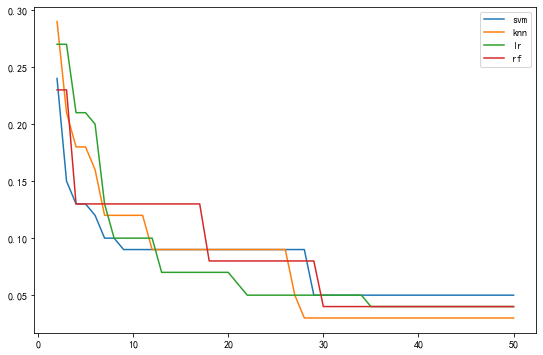

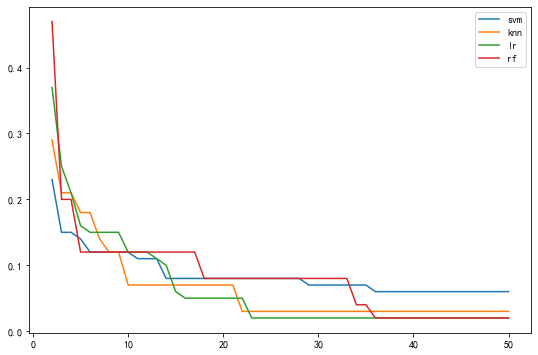

In [101]:
for i in rf_theta_t:
    plt.figure(figsize = (9,6))
    svm_theta_t[i].plot(label = 'svm')
    knn_theta_t[i].plot(label = 'knn')
    lr_theta_t[i].plot(label ='lr')
    rf_theta_t[i].plot(label ='rf')
    plt.legend()

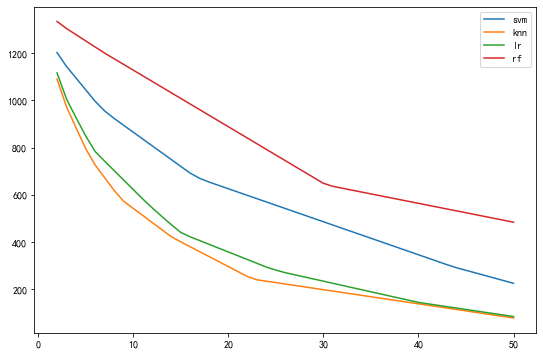

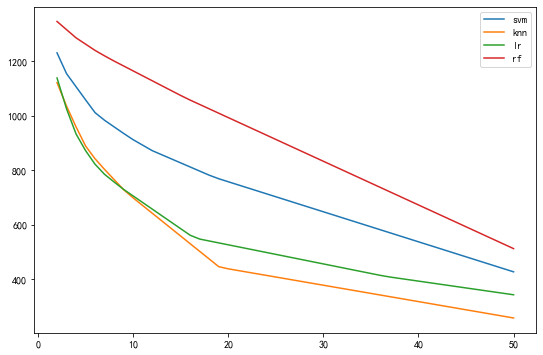

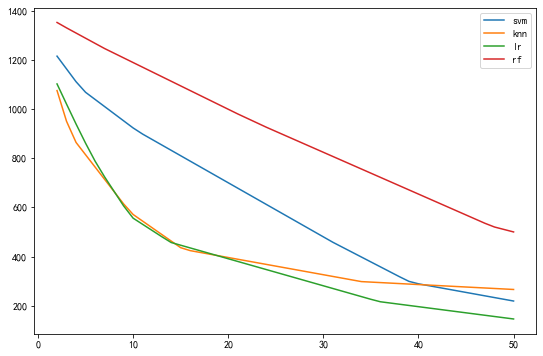

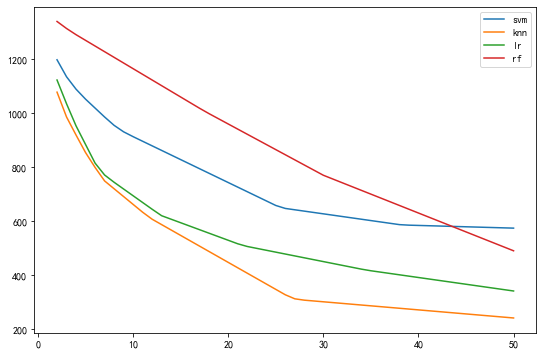

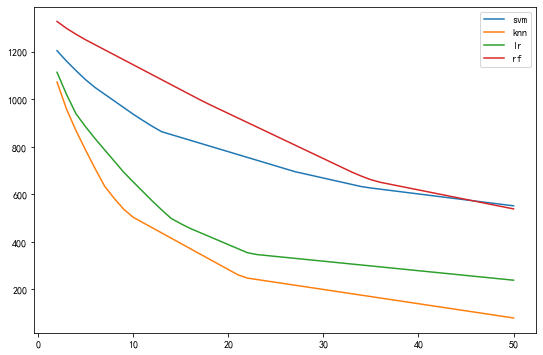

In [166]:
for i in rf_p_df_dic:
    plt.figure(figsize = (9,6))
    svm_p_df_dic[i].max().plot(label = 'svm')
    knn_p_df_dic[i].max().plot(label = 'knn')
    lr_p_df_dic[i].max().plot(label ='lr')
    rf_p_df_dic[i].max().plot(label ='rf')
    plt.legend()

In [145]:
svm_p_max = pd.DataFrame()
for i in rf_p_df_dic:
    svm_p_max[i] = svm_p_df_dic[i].max()

In [146]:
svm_p_max['mean'] = svm_p_max.mean(axis = 1)

In [147]:
def p_max_cal(p_df_dic):
    p_max = pd.DataFrame()
    for i in p_df_dic:
        p_max[i] = p_df_dic[i].max()
    p_max['mean'] = p_max.mean(axis = 1)
    return p_max

In [148]:
svm_p_max = p_max_cal(svm_p_df_dic)

In [149]:
rf_p_max = p_max_cal(rf_p_df_dic)

In [150]:
knn_p_max = p_max_cal(knn_p_df_dic)

In [151]:
lr_p_max = p_max_cal(lr_p_df_dic)

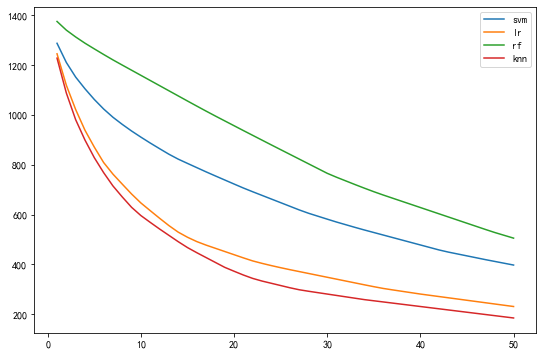

In [152]:
plt.figure(figsize = (9,6))
svm_p_max['mean'].plot(label = 'svm')
lr_p_max['mean'].plot(label = 'lr')
rf_p_max['mean'].plot(label = 'rf')
knn_p_max['mean'].plot(label = 'knn')
plt.legend()

### 减去现有收益 

In [127]:
t_range = np.arange(2,51,1)

In [128]:
theta_range = np.linspace(0.01,1,100)

p = TN -t\*FN - (1408-t\*282)

In [159]:
svm_p_max

,data0,data1,data2,data3,data4,mean,true,diff
2,1203.0,1230.0,1214.0,1198.0,1205.0,1210.0,884,326.0
3,1144.0,1153.0,1162.0,1135.0,1160.0,1150.8,602,548.8
4,1095.0,1099.0,1110.0,1086.0,1120.0,1102.0,320,782.0
5,1046.0,1052.0,1068.0,1046.0,1082.0,1058.8,38,1020.8
6,997.0,1011.0,1039.0,1009.0,1048.0,1020.8,-244,1264.8
7,956.0,977.0,1010.0,984.0,1020.0,989.4,-526,1515.4
8,923.0,957.0,981.0,960.0,992.0,962.6,-808,1770.6
9,894.0,937.0,952.0,936.0,964.0,936.6,-1090,2026.6
10,865.0,917.0,923.0,919.0,936.0,912.0,-1372,2284.0
11,836.0,897.0,899.0,902.0,910.0,888.8,-1654,2542.8


In [163]:
svm_p_df_dic['data4']

,2,3,4,5,6,7,8,9,10,11,...,41,42,43,44,45,46,47,48,49,50
0.01,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
0.02,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,145,145,145,145
0.03,289,286,283,280,277,274,271,268,265,262,...,172,169,166,163,160,157,154,151,148,145
0.04,452,449,446,443,440,437,434,431,428,425,...,335,332,329,326,323,320,317,314,311,308
0.05,617,612,607,602,597,592,587,582,577,572,...,422,417,412,407,402,397,392,387,382,377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.96,981,753,525,297,69,-159,-387,-615,-843,-1071,...,-7911,-8139,-8367,-8595,-8823,-9051,-9279,-9507,-9735,-9963
0.97,959,720,481,242,3,-236,-475,-714,-953,-1192,...,-8362,-8601,-8840,-9079,-9318,-9557,-9796,-10035,-10274,-10513
0.98,948,703,458,213,-32,-277,-522,-767,-1012,-1257,...,-8607,-8852,-9097,-9342,-9587,-9832,-10077,-10322,-10567,-10812
0.99,929,673,417,161,-95,-351,-607,-863,-1119,-1375,...,-9055,-9311,-9567,-9823,-10079,-10335,-10591,-10847,-11103,-11359


In [150]:
confusion_matrix(y_test,rf_predict)

array([[1448,    0],
       [ 282,    0]], dtype=int64)

In [129]:
# 将概率转换为预测
def pb_to_predict(pb,theta = 0.5):
    predict = np.where(pb>=theta,1,0)
    return predict

In [131]:
def p_cal(predict,y_test,t):
    tn, fp, fn, tp = confusion_matrix(y_test,predict).ravel()
    p = tn-t*fn -(1448 - t*282) 
    return p

In [139]:
np.array(1448 -svm_p_max.index*282)

array([   884,    602,    320,     38,   -244,   -526,   -808,  -1090,
        -1372,  -1654,  -1936,  -2218,  -2500,  -2782,  -3064,  -3346,
        -3628,  -3910,  -4192,  -4474,  -4756,  -5038,  -5320,  -5602,
        -5884,  -6166,  -6448,  -6730,  -7012,  -7294,  -7576,  -7858,
        -8140,  -8422,  -8704,  -8986,  -9268,  -9550,  -9832, -10114,
       -10396, -10678, -10960, -11242, -11524, -11806, -12088, -12370,
       -12652], dtype=int64)

In [140]:
svm_p_max['true'] = np.array(1448 -svm_p_max.index*282)

In [141]:
svm_p_max['diff'] = svm_p_max['mean'] - svm_p_max['true']

In [142]:
rf_p_max['true'] = np.array(1448 -rf_p_max.index*282)
rf_p_max['diff'] = rf_p_max['mean'] - rf_p_max['true']

In [143]:
lr_p_max['true'] = np.array(1448 -lr_p_max.index*282)
lr_p_max['diff'] = lr_p_max['mean'] - lr_p_max['true']

In [144]:
knn_p_max['true'] = np.array(1448 -knn_p_max.index*282)
knn_p_max['diff'] = knn_p_max['mean'] - knn_p_max['true']

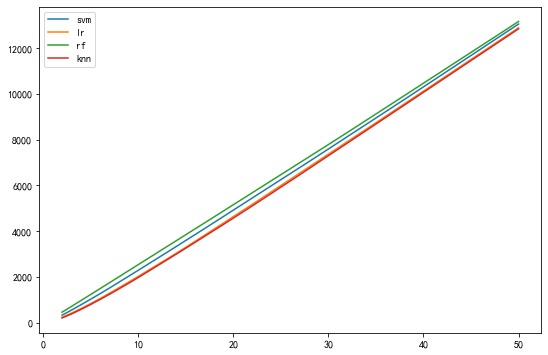

In [164]:
plt.figure(figsize = (9,6))
svm_p_max['diff'].plot(label = 'svm')
lr_p_max['diff'].plot(label = 'lr')
rf_p_max['diff'].plot(label = 'rf')
knn_p_max['diff'].plot(label = 'knn')
plt.legend()

# 保存结果

In [43]:
for i in rf_p_df_dic:
    rf_p_df_dic[i].to_csv('主回归结果\/阈值收益结果/rf_'+i+'.csv')

In [44]:
for i in lr_p_df_dic:
    lr_p_df_dic[i].to_csv('删除四变量结果/阈值收益结果/lr_'+i+'.csv')

In [45]:
for i in knn_p_df_dic:
    knn_p_df_dic[i].to_csv('删除四变量结果/阈值收益结果/knn_'+i+'.csv')

In [49]:
for i in svm_p_df_dic:
    svm_p_df_dic[i].to_csv('删除四变量结果/阈值收益结果/svm_'+i+'.csv')

In [50]:
svm_p_max.to_csv('删除四变量结果/最大收益结果/svm.csv')

In [51]:
rf_p_max.to_csv('删除四变量结果/最大收益结果/rf.csv')

In [52]:
lr_p_max.to_csv('删除四变量结果/最大收益结果/lr.csv')

In [53]:
knn_p_max.to_csv('删除四变量结果/最大收益结果/knn.csv')